In [37]:
import numpy as np
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns

In [3]:
#reading dataframes

all_data=pd.read_csv("train.csv") 
test_data=pd.read_csv("test.csv")

In [4]:
#all_data.info()

In [5]:
#test_data.info()

In [6]:
#all_data.columns

In [7]:
# X and target y for training data
X_train= all_data.iloc[:,[4,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
y_train= all_data.iloc[:, -1]

In [8]:
# X and target y for test data
X_test= test_data.iloc[:,[4,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
y_test= test_data.iloc[:, -1]

In [9]:
#Convert y target to 1 for satisfied and 0 for neutral or dissatisfied

y_train = y_train.replace('satisfied',1)
y_train = y_train.replace('neutral or dissatisfied',0)

y_test = y_test.replace('satisfied',1)
y_test = y_test.replace('neutral or dissatisfied',0)

In [10]:
#Train and validation split

X= X_train
y= y_train

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2,random_state=42)

In [11]:

#Evaluate models with Root Mean Squared Error
def rmse(actuals, preds):
    return np.sqrt(((actuals - preds) ** 2).mean())

In [12]:
#Baseline  Model

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [13]:
#ROC score for Baseline Random Forest with Test Set

roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

0.9888256282187312

In [14]:
#RMSE for Baseline Random Forest with Test Set

rmse(rf.predict(X_test), y_test)

0.22636167031977822

In [15]:
print('Parameters of baseline model:')
rf.get_params()

Parameters of baseline model:


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [16]:
#Tuning Max Depth of Tree with 1,3,6,9, 12

max_depth_x= [1,3,6,9,12]
max_depth_roc=[]       #ROC AUC 
max_depth_error=[]  #RMSE

In [17]:
#Max Depth of 1
rf_a = RandomForestClassifier(max_depth=1, random_state=0)
rf_a.fit(X_train,y_train)
max_depth_error.append(rmse(rf_a.predict(X_test), y_test))
max_depth_roc.append(roc_auc_score(y_test, rf_a.predict_proba(X_test)[:,1]))
roc_auc_score(y_test, rf_a.predict_proba(X_test)[:,1])

0.875791798690158

In [18]:
#Max Depth of 3
rf_a = RandomForestClassifier(max_depth=3, random_state=0)
rf_a.fit(X_train,y_train)
max_depth_error.append(rmse(rf_a.predict(X_test), y_test))
max_depth_roc.append(roc_auc_score(y_test, rf_a.predict_proba(X_test)[:,1]))
roc_auc_score(y_test, rf_a.predict_proba(X_test)[:,1])

0.9295516999668285

In [19]:
#Max Depth of 6
rf_a = RandomForestClassifier(max_depth=6, random_state=0)
rf_a.fit(X_train,y_train)
max_depth_error.append(rmse(rf_a.predict(X_test), y_test))
max_depth_roc.append(roc_auc_score(y_test, rf_a.predict_proba(X_test)[:,1]))
roc_auc_score(y_test, rf_a.predict_proba(X_test)[:,1])

0.9614267666544392

In [20]:
#Max Depth of 9
rf_a = RandomForestClassifier(max_depth=9, random_state=0)
rf_a.fit(X_train,y_train)
max_depth_error.append(rmse(rf_a.predict(X_test), y_test))
max_depth_roc.append(roc_auc_score(y_test, rf_a.predict_proba(X_test)[:,1]))
roc_auc_score(y_test, rf_a.predict_proba(X_test)[:,1])

0.9778597312887434

In [21]:
#Max Depth of 12
rf_a = RandomForestClassifier(max_depth=12, random_state=0)
rf_a.fit(X_train,y_train)
max_depth_error.append(rmse(rf_a.predict(X_test), y_test))
max_depth_roc.append(roc_auc_score(y_test, rf_a.predict_proba(X_test)[:,1]))
roc_auc_score(y_test, rf_a.predict_proba(X_test)[:,1])


0.9851749368089849

In [22]:
#Max Depth list to dataframe
max_depth_list = [max_depth_x, max_depth_roc, max_depth_error]
df  = pd.DataFrame (max_depth_list).transpose()
df. columns=(['Max Depth','ROC AUC Score','RMSE'])
print (df)

   Max Depth  ROC AUC Score      RMSE
0        1.0       0.875792  0.433435
1        3.0       0.929552  0.404252
2        6.0       0.961427  0.315094
3        9.0       0.977860  0.276714
4       12.0       0.985175  0.252337


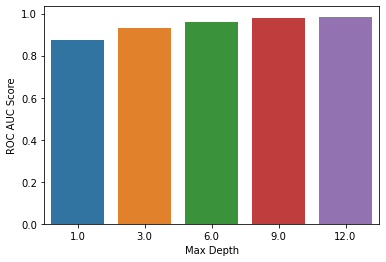

In [23]:
ax = sns.barplot(x="Max Depth", y="ROC AUC Score", data=df)

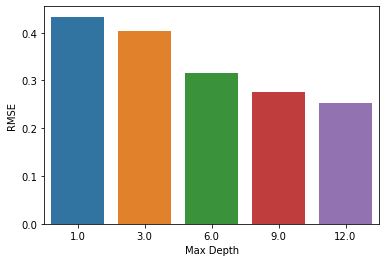

In [24]:
ax = sns.barplot(x="Max Depth", y="RMSE", data=df)

In [25]:
#Max Depth Conculsion
#Tree Depth of 12 has a  high score, but is computationally expensive for SHAP values
#Tree Depth of 9 is able to run

max_improve_roc = ((df['ROC AUC Score'][3] - df['ROC AUC Score'][0])/df['ROC AUC Score'][0])*100
format_max_improve_roc = "{:.2f}".format(max_improve_roc)

max_improve_rmse = ((df['RMSE'][3] - df['RMSE'][0])/df['RMSE'][0])*100
format_max_improve_rmse = "{:.2f}".format(max_improve_rmse)

print ("Improvement in ROC AUC Score with a Max Depth of 9 versus a Max Depth of 1:", format_max_improve_roc, "%")
print ("Improvement in RMSE Score with a Max Depth of 9 versus a Max Depth of 1:", format_max_improve_rmse, "%")



Improvement in ROC AUC Score with a Max Depth of 9 versus a Max Depth of 1: 11.65 %
Improvement in RMSE Score with a Max Depth of 9 versus a Max Depth of 1: -36.16 %


In [26]:
#Tuning n_estimators (Number of Trees) with Trees of  10, 100, 1000

n_trees_x= [10,100,1000]
n_trees_roc=[]       #ROC AUC 
n_trees_error=[]  #RMSE

In [27]:
#Number of Trees equal to  10
rf_b = RandomForestClassifier(random_state=0, n_estimators=10)
rf_b.fit(X_train,y_train)
n_trees_error.append(rmse(rf_b.predict(X_test), y_test))
n_trees_roc.append(roc_auc_score(y_test, rf_b.predict_proba(X_test)[:,1]))
roc_auc_score(y_test, rf_b.predict_proba(X_test)[:,1])

0.9834838674790176

In [28]:
#Number of Trees equal to  100
rf_b = RandomForestClassifier(random_state=0, n_estimators=100)
rf_b.fit(X_train,y_train)
n_trees_error.append(rmse(rf_b.predict(X_test), y_test))
n_trees_roc.append(roc_auc_score(y_test, rf_b.predict_proba(X_test)[:,1]))
roc_auc_score(y_test, rf_b.predict_proba(X_test)[:,1])

0.9888256282187312

In [29]:
#Number of Trees equal to  1000
rf_b = RandomForestClassifier(random_state=0, n_estimators=1000)
rf_b.fit(X_train,y_train)
n_trees_error.append(rmse(rf_b.predict(X_test), y_test))
n_trees_roc.append(roc_auc_score(y_test, rf_b.predict_proba(X_test)[:,1]))
roc_auc_score(y_test, rf_b.predict_proba(X_test)[:,1])

0.9894949159270184

In [30]:
#Max Depth list to dataframe
n_trees_list = [n_trees_x, n_trees_roc, n_trees_error]
df  = pd.DataFrame (n_trees_list).transpose()
df. columns=(['Number of Trees','ROC AUC Score','RMSE'])
print (df)

   Number of Trees  ROC AUC Score      RMSE
0             10.0       0.983484  0.238938
1            100.0       0.988826  0.226362
2           1000.0       0.989495  0.225168


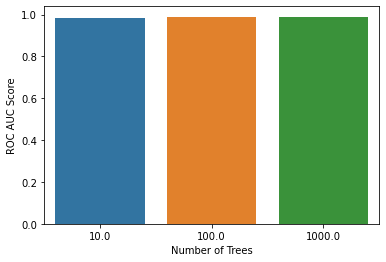

In [31]:
ax = sns.barplot(x="Number of Trees", y="ROC AUC Score", data=df)

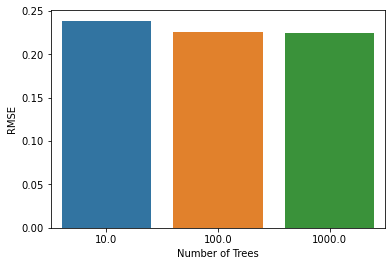

In [32]:
ax = sns.barplot(x="Number of Trees", y="RMSE", data=df)

In [33]:
#Number of Trees Conculsion
#Number of Trees equal to 1000  has a  high score, but is computationally expensive for SHAP values
#Number of Tress equal to 100  is able to run

n_trees_improve_roc = ((df['ROC AUC Score'][1] - df['ROC AUC Score'][0])/df['ROC AUC Score'][0])*100
format_n_trees_improve_roc = "{:.2f}".format(n_trees_improve_roc)

n_trees_improve_rmse = ((df['RMSE'][1] - df['RMSE'][0])/df['RMSE'][0])*100
format_n_trees_improve_rmse = "{:.2f}".format(n_trees_improve_rmse)

print ("Improvement in ROC AUC Score with a Number of Trees of 100 versus a Number of Trees of 10:", format_n_trees_improve_roc, "%")
print ("Improvement in RMSE Score with a Number of Trees of 100 versus a Number of Trees of 10:", format_n_trees_improve_rmse, "%")




Improvement in ROC AUC Score with a Number of Trees of 100 versus a Number of Trees of 10: 0.54 %
Improvement in RMSE Score with a Number of Trees of 100 versus a Number of Trees of 10: -5.26 %


In [34]:
#Tuned Random Forest model with Test Data

rf_2 = RandomForestClassifier(max_depth=9, random_state=0, n_estimators=100)
rf_2.fit(X_train,y_train)


RandomForestClassifier(max_depth=9, random_state=0)

In [45]:
#RMSE for Baseline Random Forest with Validation Set

rmse(rf.predict(X_val), y_val)


0.22499592305520416

In [46]:
#ROC score for Basline Random Forest with  Validation Set

roc_auc_score(y_val, rf.predict_proba(X_val)[:,1])

0.9890994066252455

In [47]:
#RMSE for Baseline Random Forest with Test Set

rmse(rf.predict(X_test), y_test)


0.22636167031977822

In [48]:
#ROC score for Baseline Random Forest with  Test Set

roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

0.9888256282187312

In [49]:
#RMSE for Tuned Random Forest with Validation Set

rmse(rf_2.predict(X_val), y_val)

0.26848664345777173

In [50]:
#ROC score for Tuned Random Forest with  Validation Set

roc_auc_score(y_val, rf_2.predict_proba(X_val)[:,1])

0.9787935729516226

In [52]:
#RMSE for Tuned Random Forest with Test Set

rmse(rf_2.predict(X_test), y_test)

0.2767140773944691

In [53]:
#ROC score for Tuned Random Forest with Test

roc_auc_score(y_test, rf_2.predict_proba(X_test)[:,1])

0.9778597312887434

In [38]:
#RF Classification report on Baseline Model

print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     14573
           1       0.96      0.93      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [40]:
#RF Classification report on Tuned Model

print(classification_report(y_test, rf_2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     14573
           1       0.92      0.90      0.91     11403

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



In [ ]:
#Conclusion

#Tuned model with ROC of 0.98 is similar to Basline  model with 0.99
#Baseline model is computationally expensive to get SHAP Values which renders
#it not interpretable

#Tuned model is able to get SHAP values and somewhat interpretable 
